<h2 style='font-family: cursive; font-size: 40px;'>Método Newton-Raphson</h2>
<img src='http://www.cs.uleth.ca/~holzmann/notes/NewtonsMethod/cube_root_27_anim.gif' align='middle' width='300'>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Formulación matemática</h3>

<p style="font-size: 19px">
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$x_k$ $=$ $x_k$ - $\frac{f(x_k)}{f'(x_k)}$ 
</p>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Valores iniciales</h3>

<p style="font-size: 16px">
    &emsp;&emsp;&emsp;&emsp;$x_0$: &emsp;&emsp;Punto inicial de la aproximación. <br>
    &emsp;&emsp;&emsp;&emsp;$tol$: &emsp;&emsp;La exactitud de la aproximación.
</p>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Ventajas y desventajas</h3>

<table style="width:100%; text-align: left; font-size: 14px">
    <tr style="text-align: left;">
        <th style="text-align: left;">Ventajas</th>
        <th style="text-align: left;">Desventajas</th>
    </tr>
    <tr>
        <td style="text-align: left;">Es más eficiente para la resolución de sistemas de ecuaciones no lineales.</td>
        <td style="text-align: left;">Tiene que evaluar una derivada.</td>
    </tr>
    <tr>
        <td style="text-align: left;">Converge muy rápidamente.</td>
        <td style="text-align: left;">No existe un criterio general de convergencia.</td>
    </tr>
    <tr>
        <td style="text-align: left;">Tiene una buena presición en los resultados.</td>
        <td style="text-align: left;">Tener un valor suficientemente cercano a la raíz.</td>
    </tr>
   
</table>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Pseudocódigo</h3>

<ol>
    <li>Para $iter$ iteraciones</li>
    <li>$den =$ $f'(x_0)$</li>
    <li>Si error &lt; tol ó $den$ igual a 0</li>
    <li>Salir y retorna resultados</li>
    <li>Sino</li>
    <li>$x_1$ = $x_0$ - $\frac{f(x_0)}{f'(x_0)}$</li>
    <li>$error = |f(x_k)|$</li>
    <li>$x_0$ = $x_1$</li>
    <li>Fin Si</li>
    <li>Fin Para</li>
</ol>

<h3 style="font-family: 'Courier New'; font-size:25px">Octave</h3>

    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    minus at line 57 column 5
    str2func>@<anonymous> at line 1 column 16
    derivate at line 4 column 7
    newton_raphson at line 17 column 13
    newton_raphson at line 26 column 13
x1 =  2.740646095973693
e =

 Columns 1 through 3:

   8.131648366314121e-01   7.205526976507137e-02   4.634513820374053e-04

 Column 4:

   1.951061046057134e-08



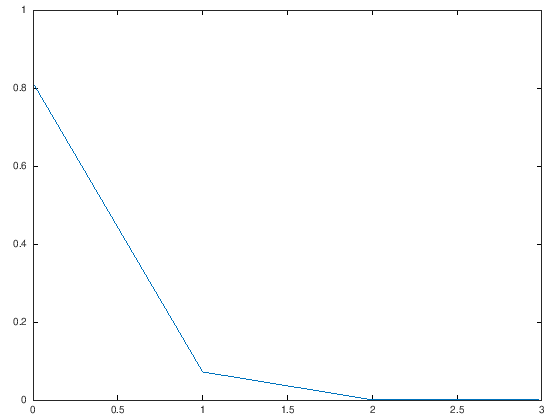

In [4]:
format long
function y=derivate(f)
    pkg load symbolic
    syms x;
    ff=f(x);
    ffd=diff(ff,x);
    y=function_handle(ffd);
end

function [x1,e]=newton_raphson(f,x0,tol,iter)  
    footion = str2func(strcat('@(x)',f)); 
    deetion = derivate(footion);
    e=[];
    error=tol+1;
    
    if tol < 10^(-8)
        display("Debe escoger una tolerancia más grande.");
        return;
    else
        for i=1:iter
            den=deetion(x0);
            if error < tol | den == 0  
                break;
            else
                x1 = x0 - footion(x0)/den;
                error = footion(x1);
                e=[e error];
                x0 = x1;
            end
        end
    end
    plot(0:length(e)-1,e);
end
[x1,e]=newton_raphson('x*log10(x) - 1.2',2,10**(-7),15)

<h3 style="font-family: 'Courier New'; font-size:25px">Python</h3>

In [1]:
def iter_list(it):
    list = []
    for i in range(it):
        list.append(i)
    return list
    
    
def plot(e):
    import matplotlib.pyplot
    matplotlib.pyplot.plot(iter_list(len(e)), e)
    
    
def get_funcs(f):
    from sympy import symbols, sympify, diff
    footion = sympify(f)
    x = symbols('x')
    deetion = diff(footion, x)
    return footion, deetion

print(get_funcs('x^2'));


def newton_raphson(f, x0, tol, iter):
    """
    Esta función aproxima la solución de una ecuació f(x)=0, implementando el metodo de la Secante.
    Parametros iniciales:
    f = una  cadena de caracteres (string) que representa a la función f.
    x0 = punto donde comienza la iteración.
    tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    iter = cantidad de iteraciones máximas.
    Parámetros de Salida: 
    [x1,error], donde                
    x1 = aproximación del cero de la función f.
    error =  |f(x_k)|
    """
    footion, deetion = get_funcs(f)
    error = tol + 1
    x1 = 0
    e = []
    
    if tol < 10^-8:
        print("Debe escoger una tolerancia más grande.")
        return
    else:
        for i in range(iter):
            den = float(deetion.subs({'x': x0}))
            if error < tol or den == 0:
                break
            else:
                x1 = x0 - float(footion.subs({'x' : x0})) / den
                error = abs(x1 - x0)
                e.append(error)
                x0 = x1

    plot(e)
    return x1, e

(x**2, 2*x)


<h3 style="font-family: 'Courier New'; font-size:25px">Ejemplo Numérico</h3>

<h5 style="font-family: 'Courier New'; font-size:16px">Python</h5>

(0.5482170813639983, [0.21436023859349018, 0.012534394546906968, 4.292488544388462e-05, 5.251376000714458e-10])


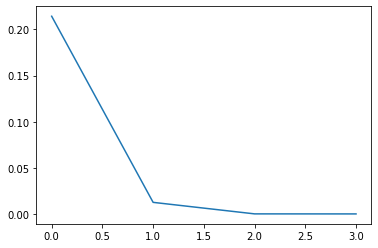

In [8]:
print(newton_raphson('exp(-2*x^2)^2-x^2', 3/4, 0.00001, 5))

<h5 style="font-family: 'Courier New'; font-size:16px">Octave</h5>

    double_to_sym_heuristic at line 50 column 7
    sym at line 379 column 13
    minus at line 57 column 5
    str2func>@<anonymous> at line 1 column 16
    derivate at line 4 column 7
    newton_raphson at line 17 column 13
    newton_raphson at line 26 column 13
x1 =  2.740646095973693
e =

 Columns 1 through 3:

   8.131648366314121e-01   7.205526976507137e-02   4.634513820374053e-04

 Column 4:

   1.951061046057134e-08



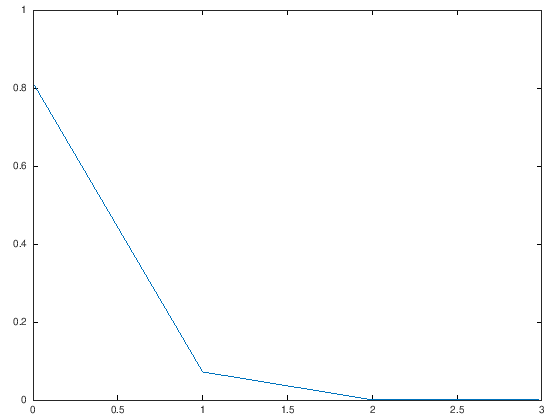

In [3]:
[x1,e]=newton_raphson('x*log10(x) - 1.2',2,10**(-7),15)